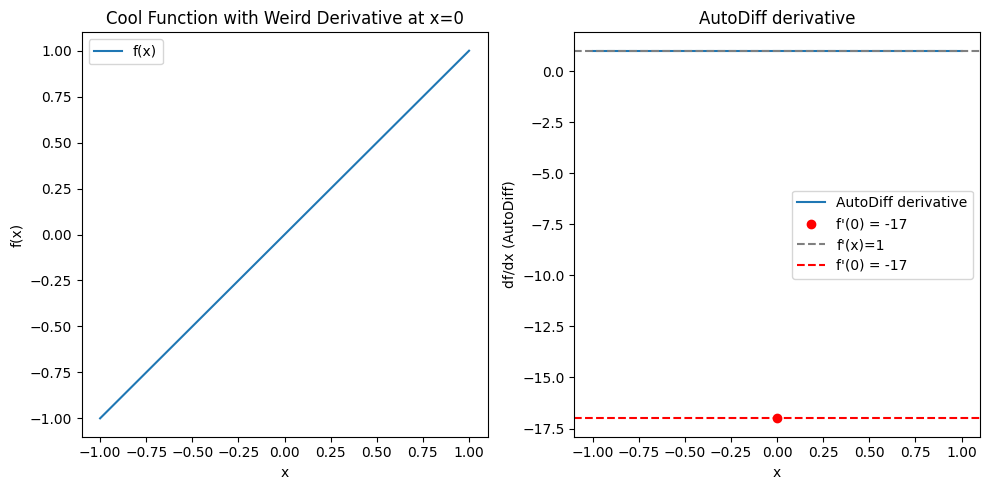

In [6]:
# Lab 04 AutoDiff Deliverable

# Used PyTorch as I am more familiar with it than jax :)

import torch
import matplotlib.pyplot as plt

def f(x):
    y = x.clone() # Need clone to avoid in-place operations on x.

    def grad_hook(grad): # Gradient hook to modify gradient at x=0.
                         # for more info: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function.register_hook
                         # There is probably a cleaner way to do this, but it works!
        grad = grad.clone()
        grad[x == 0] = -17.0
        return grad

    y.register_hook(grad_hook)
    return y

x = torch.linspace(-1, 1, 400, requires_grad=True) # pick up the hook 
y = f(x)
y.sum().backward() # backprop

dy_dx = x.grad # 1-d function derivative is just x.grad

plt.figure(figsize=(10, 5))

# Plot function
plt.subplot(1, 2, 1)
plt.plot(x.detach(), f(x).detach(), label="f(x)")
plt.title("Cool Function with Weird Derivative at x=0")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Plot derivative
plt.subplot(1, 2, 2)
plt.plot(x.detach(), dy_dx, label="AutoDiff derivative")
plt.scatter([0], [-17], color="red", zorder=5, label="f'(0) = -17")
plt.axhline(1, linestyle="--", color="gray", label="f'(x)=1")
plt.axhline(-17, linestyle="--", color="red", label="f'(0) = -17")

plt.xlabel("x")
plt.ylabel("df/dx (AutoDiff)")
plt.legend()
plt.title("AutoDiff derivative")
plt.tight_layout()
plt.show()

